<h1 style="color:rgb(0,120,170)">Assignment 4: PCA and Kernel PCA</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Theoretical aspects concerning PCA</h2>

Our aim is to discuss a certain aspect of the mathematical derivation of PCA, that has not been adressed in full detail in the lectures. We use the same notation as in the lecture, i.e. we are given a data matrix $\mathbf{X}= ( \mathbf{x}_1,...,\mathbf{x}_n )^\top$, where each $\mathbf{x}_i \in \mathbb{R}^m$ for $1\le i \le n$. 

A main reason, why PCA works very well, is the fact that the covariance matrix, defined as $\mathbf{C}=\frac 1n \mathbf{X}^T\mathbf{X}$, or equivalently, $c_{st}=\frac1n \sum_{i=1}^n x_{is} x_{it}$, is positive semi-definite. 
* Show this fact by proving $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$. 
* Moreover, show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are non-negative. 
* Why is this an important fact in PCA? 

<h3 style="color:rgb(210,90,80)">Exercise 1 (20 points):</h3>

########## YOUR SOLUTION HERE ##########


### 1)  $\mathbf{C}$ is positive semi-definitive

Considering any vector $\mathbf{a} \in \mathbb{R}^m$, the quadratic form of $\mathbf{C}$ with respect to $\mathbf{a}$ is:

$$
\langle \mathbf{C}\mathbf{a}, \mathbf{a} \rangle = \sum_{s,t=1}^m a_s a_t c_{st}
$$

Substituting $c_{st}$ gives:
$$
\langle \mathbf{C}\mathbf{a}, \mathbf{a} \rangle = \frac{1}{n} \sum_{s,t=1}^m a_s a_t \sum_{i=1}^n x_{is} x_{it} = \frac{1}{n} \sum_{i=1}^n \left( \sum_{s=1}^m a_s x_{is} \right)^2
$$

Since $\left( \sum_{s=1}^m a_s x_{is} \right)^2 \geq 0$ for all $i$, and the sum of non-negative numbers is non-negative, therefore:
$$
\langle \mathbf{C}\mathbf{a}, \mathbf{a} \rangle \geq 0
$$
Thus, $\mathbf{C}$ is positive semi-definite.

### 2) Eigenvalues are non-negative

From the definition: for any eigenvector $\mathbf{v}$ of $\mathbf{C}$ with eigenvalue $\lambda$ the relation is $\mathbf{C}\mathbf{v} = \lambda \mathbf{v}$. Applying the quadratic form, it leads to: 

$$
\langle \mathbf{C}\mathbf{v}, \mathbf{v} \rangle = \langle \lambda \mathbf{v}, \mathbf{v} \rangle = \lambda \langle \mathbf{v}, \mathbf{v} \rangle
$$

Since $\langle \mathbf{C}\mathbf{v}, \mathbf{v} \rangle \geq 0$ (as shown before) and $\langle \mathbf{v}, \mathbf{v} \rangle$ is also positive (since it is the norm of the squared of $\mathbf{v}$), we can assume that $\lambda$ must be positive

### 2) Why it is important?

The eigenvalues in the PCA represent the variance of each component. The fact that it cannot be negative implies: 
- the variance cannot be negative
- the eigenvectors associated to positive eigenvalues explain a positive amount of variance 
- all maths calculations involving square roots are not in imaginary numbers 


<h2 style="color:rgb(0,120,170)">PCA applied to real world data set</h2>

We use the provided data set faces94.csv which is essentially based
on the pictures from the collection of Facial Images 1. This data set consists of $45 \times 50$
gray scale pixel images.
Let us first read in the data and plot the first image as an example.
This exercise should give you a feeling of what it really means to preserve variance.

In [1]:
#read data. Nothing to do here
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 

# import data from csv file,
data = np.genfromtxt('faces94.csv', delimiter=',')

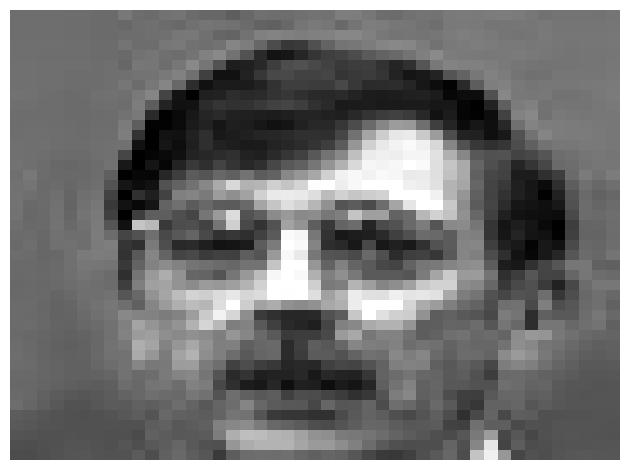

In [2]:
#plot first image as an example. Nothing to do here
def plotImg(x):
    fig, ax = plt.subplots()
    ax.pcolor(x.reshape(45, 50).T, cmap=cm.gray)
    ax.set_ylim([45, 0])
    ax.axis("off")
    fig.tight_layout()
    
# plot first img
plotImg(data[0, :])

<h3 style="color:rgb(210,90,80)">Exercise 2 (10 points):</h3>

We next use PCA for data-compression. Downproject the data using enough PCs to
explain $50 \% $, $75 \% $ and $99 \% $ of the variance. To do this use the sklearn-package. Print the number of principal components needed and also the explained variance for each of the tasks. 

In [3]:
########## YOUR SOLUTION HERE ##########
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Fit PCA on the standardized data
pca = PCA().fit(data_std)

# Calculate the cumulative sum of explained variance ratios
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed to explain at least 50%, 75%, and 99% of the variance
components_50 = np.where(cumulative_variance_ratio > 0.5)[0][0] + 1 
components_75 = np.where(cumulative_variance_ratio > 0.75)[0][0] + 1
components_99 = np.where(cumulative_variance_ratio > 0.99)[0][0] + 1

# Print the results
print(f"Number of PCs to explain at least 50% of variance: {components_50}, explained variance: {cumulative_variance_ratio[components_50 - 1]}")
print(f"Number of PCs to explain at least 75% of variance: {components_75}, explained variance: {cumulative_variance_ratio[components_75 - 1]}")
print(f"Number of PCs to explain at least 99% of variance: {components_99}, explained variance: {cumulative_variance_ratio[components_99 - 1]}")

# Downproject
pca_50 = PCA(n_components=components_50)
data_50 = pca_50.fit_transform(data_std)

pca_75 = PCA(n_components=components_75)
data_75 = pca_75.fit_transform(data_std)

pca_99 = PCA(n_components=components_99)
data_99 = pca_99.fit_transform(data_std)

Number of PCs to explain at least 50% of variance: 4, explained variance: 0.5158839750838853
Number of PCs to explain at least 75% of variance: 19, explained variance: 0.7525923067946673
Number of PCs to explain at least 99% of variance: 393, explained variance: 0.9900024945450309


<h3 style="color:rgb(0,120,170)">Exercise 3 (10 points):</h3>

You have essentially compressed vectors of dimension $d = 2250$ into vectors of much smaller dimension. Implement a function, that decompresses the data again, i.e. reconstruct the $2250$ dimensional data points, given the lower-dimensional representation. Print the dimension of the back-transformed data and the back-transformed data itself to check, if your result is indeed correct. 

In [4]:
########## YOUR SOLUTION HERE ##########
# Function to reconstruct the data
def decompress(pca_model, reduced_data):
    # Using inverse_transform to reconstruct the data from the reduced form
    original_data = pca_model.inverse_transform(reduced_data)
    return original_data

# Decompress the data
reconstructed_data = decompress(pca_75, data_75)

# Print some results
print("Shape of the data_75:", data_75.shape)
print("Shape of the reconstructed data:", reconstructed_data.shape)
print("Some reconstructed data points:", reconstructed_data[0:2])  # Displaying first 2 entries
print("Original data points:", data_std[0:2]) # differ since some information are lost
print("Dimension of the back-transformed data:", reconstructed_data.shape[1])

Shape of the data_75: (3059, 19)
Shape of the reconstructed data: (3059, 2250)
Some reconstructed data points: [[ 0.4578458   0.47556581  0.48010512 ... -0.26748707 -0.12903226
  -0.07683604]
 [-1.91534554 -1.92693759 -1.94495922 ... -0.18843829  0.45843831
   0.74694673]]
Original data points: [[ 0.48421342  0.47236624  0.47626073 ...  0.3404691   0.15410146
   0.14981228]
 [-2.02439979 -1.9818711  -1.95538357 ... -1.47515812  1.64429017
   2.44383808]]
Dimension of the back-transformed data: 2250


<h3 style="color:rgb(210,90,80)">Exercise 4 (15 points):</h3>

Plot a few of the images and their reconstructions with $50 \% $, $75 \% $ and $99 \% $ of the variance.

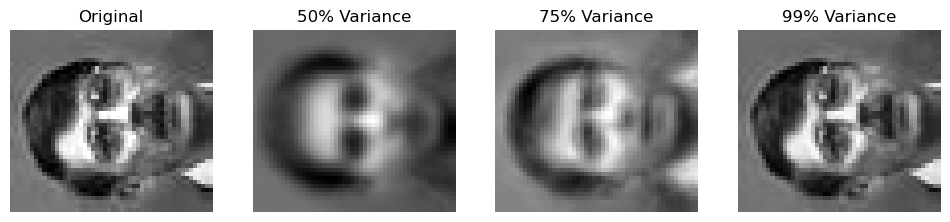

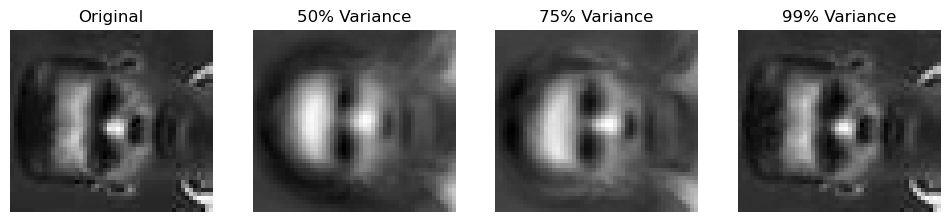

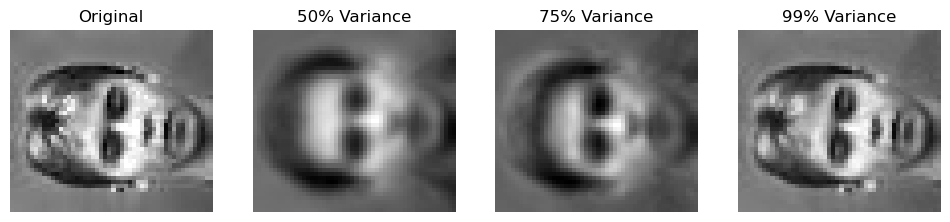

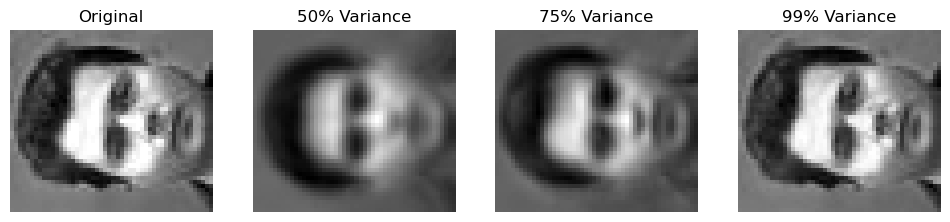

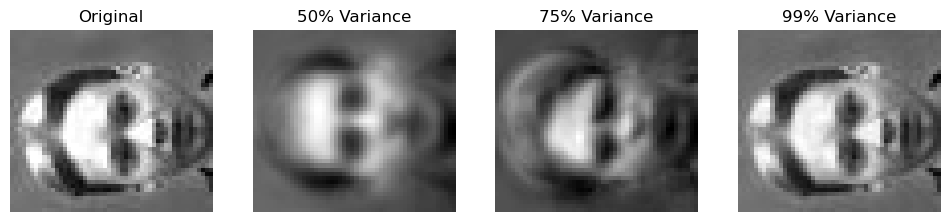

In [5]:
########## YOUR SOLUTION HERE ##########

# Reconstruct the data from the reduced representations
reconstructed_data_50 = decompress(pca_50, data_50)
reconstructed_data_75 = decompress(pca_75, data_75)
reconstructed_data_99 = decompress(pca_99, data_99)

# Convert reconstructed data back to the original scale
reconstructed_data_50 = scaler.inverse_transform(reconstructed_data_50)
reconstructed_data_75 = scaler.inverse_transform(reconstructed_data_75)
reconstructed_data_99 = scaler.inverse_transform(reconstructed_data_99)

# Define a function to plot the images
def plot_images(original, recon_50, recon_75, recon_99, index):
    fig, axes = plt.subplots(1, 4, figsize=(12, 3))
    titles = ['Original', '50% Variance', '75% Variance', '99% Variance']
    images = [original[index].reshape(45, 50), recon_50[index].reshape(45, 50),
              recon_75[index].reshape(45, 50), recon_99[index].reshape(45, 50)]

    for ax, image, title in zip(axes, images, titles):
        ax.imshow(image, cmap='gray')
        ax.set_title(title)
        ax.axis('off')

# Plot a few examples
for i in range(5):
    plot_images(data, reconstructed_data_50, reconstructed_data_75, reconstructed_data_99, i)

plt.show()

<h3 style="color:rgb(210,90,80)">Exercise 5 (5 points):</h3>

Comment on your observations. What type of information is preserved using the 3 different compression rates, what is lost?

########## YOUR SOLUTION HERE ##########

1. **50% Variance**: The images reconstructed with 50% appear quite raw and with a lack of details. This level of compression still have the most general features and shape, like the head outline and some facial details (e.g., nose, mouth), but is loses must of the texture and fine details. In general, the 50% variance capture the general contour of the image but not the details.

2. **75% Variance**: The images with 75% variance have more clarity w.r.t. to the 50% variance. There is more differenciation in facial features and background. Contours are more defined as well as shadows. However, there are still loss of details and sharpness.

3. **99% Variance**: At this level, the reconstructed images are very close to the original. There are lot of details, sharpness, shadows. The loss is minimal and in some cases hard the define.

In conclusion, while the general shape is captured even with 50% or 75% variance, the remaining 25% still plays a crucial role in the details and sharpness.



<h2 style="color:rgb(0,120,170)">PCA vs. Kernel PCA</h2>

Consider the two-dimensional data sets pca3.csv and pca4.csv
(the latter data set has as a third column as label, which should be used for coloring
the plots). First let us read the data, and for pca4 we additionally separate label from date:

In [6]:
#Read data. Nothing to do here!
data3 = np.genfromtxt('pca3.csv', delimiter = ',', skip_header = 0) 
data4 = np.genfromtxt('pca4.csv', delimiter = ',', skip_header = 0)

<h3 style="color:rgb(0,120,170)">Exercise 6 (10 Points):</h3>

* Perform PCA for data3 and data4, visualize the principal components together with the data and
determine the proportion of variance for each of the components.

Proportion of variance explained by each component for data3: [0.593217 0.406783]
Proportion of variance explained by each component for data4: [0.54469358 0.45530642]


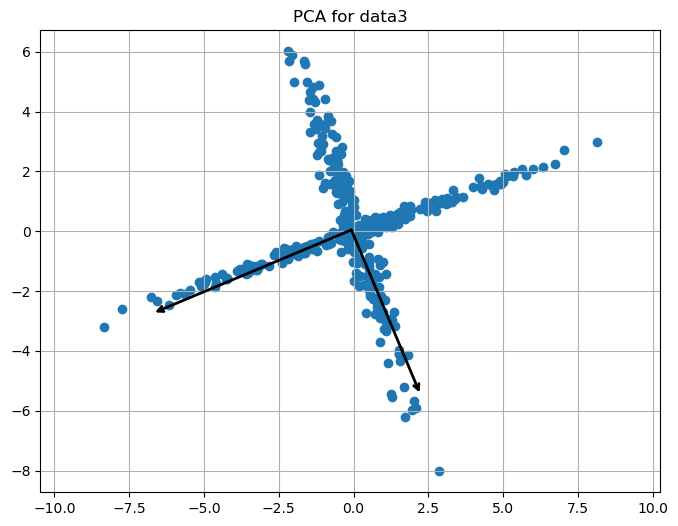

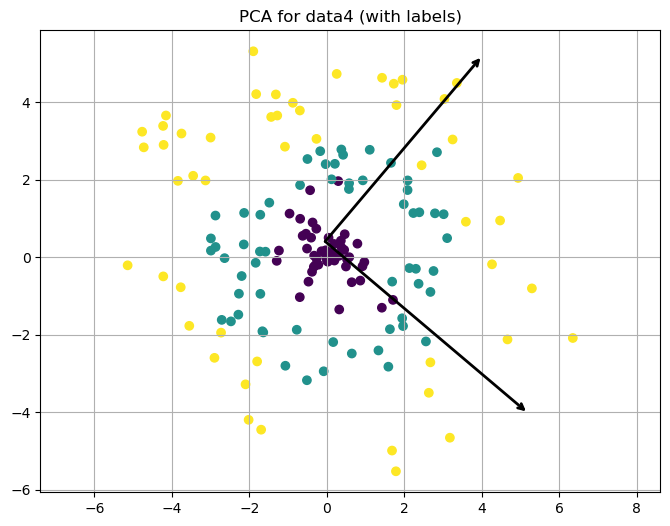

In [7]:
########## YOUR SOLUTION HERE ##########
# Perform PCA on both datasets
pca_data3 = PCA(n_components=2)
pca_data3.fit(data3)
pca_data4 = PCA(n_components=2)
pca_data4.fit(data4[:, :-1]) # data4 includes labels --> excluding the label for PCA

# Proportions of variance for each dataset
prop_var_data3 = pca_data3.explained_variance_ratio_
prop_var_data4 = pca_data4.explained_variance_ratio_

# Print out the proportions of variance
print("Proportion of variance explained by each component for data3:", prop_var_data3)
print("Proportion of variance explained by each component for data4:", prop_var_data4)

# Visualize the data and the principal components
def plot_pca_results(data, pca, title):
    plt.figure(figsize=(8, 6))
    if data.shape[1] == 3:  # If data has labels, color the points accordingly
        plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap='viridis')
    else:
        plt.scatter(data[:, 0], data[:, 1])
    plt.title(title)

    # Plot the principal components
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length) # used 3*rad(l) as a scalar
        arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0)
        plt.annotate('', pca.mean_ + v, pca.mean_, arrowprops=arrowprops) # add the rows
    plt.grid()
    plt.axis('equal')

plot_pca_results(data3, pca_data3, "PCA for data3")
plot_pca_results(data4, pca_data4, "PCA for data4 (with labels)")
plt.show()


<h3 style="color:rgb(0,120,170)">Exercise 7 (20 points):</h3>

* Perform Kernel PCA on both datasets. Try polynomial and RBF-kernels. For polynomial kernel use at least the parameters $\gamma=2$ and degree $3$, for RBF $\gamma=0.25$. You are of course allowed (and encourgaged) to try more different parameters and also different kernels to get a better feeling.

* Also visualize the projected data together with the original ones. 

* Finally, visualize the projection onto the first principal component in the RBF-kernel plots for data4 (can also be done together in one plot). This should also convince you about the fact that the first PC already contains a huge part of the information of the data, e.g. the data can already be well separated by the first PC. 

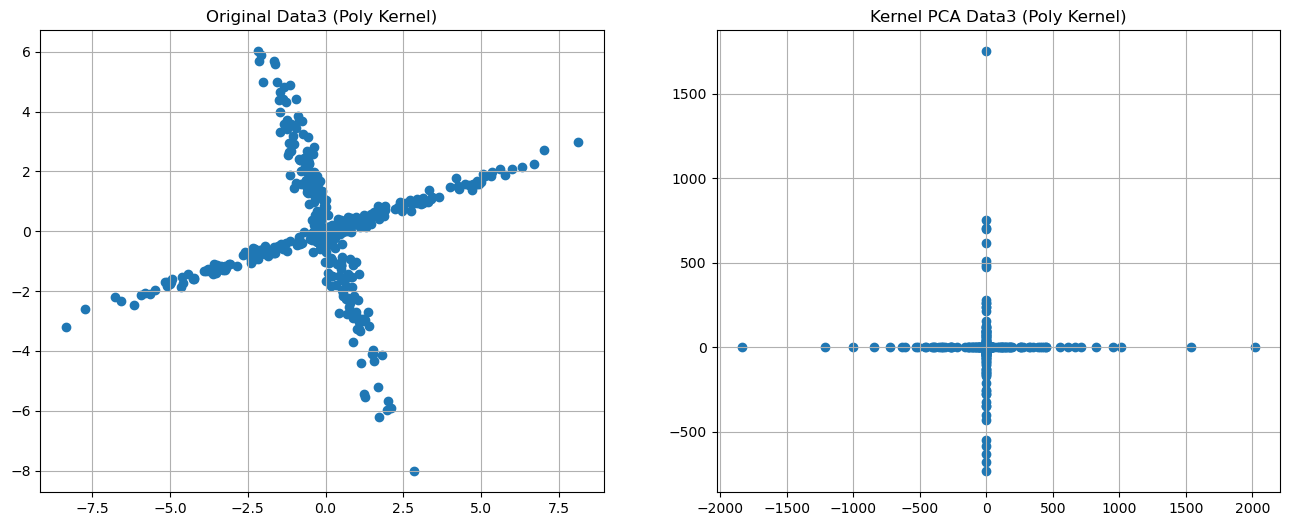

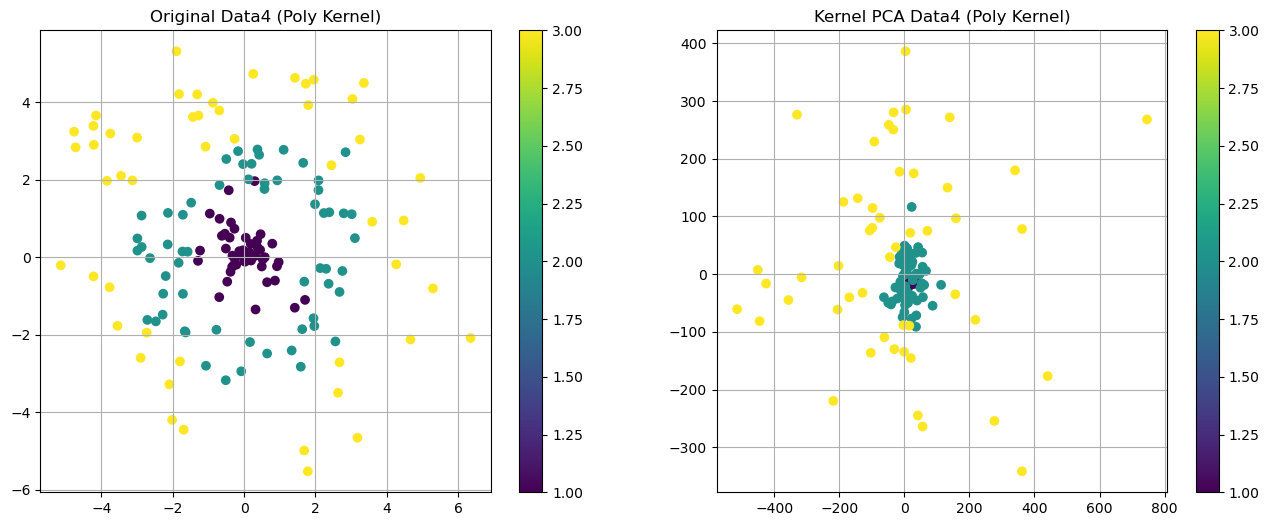

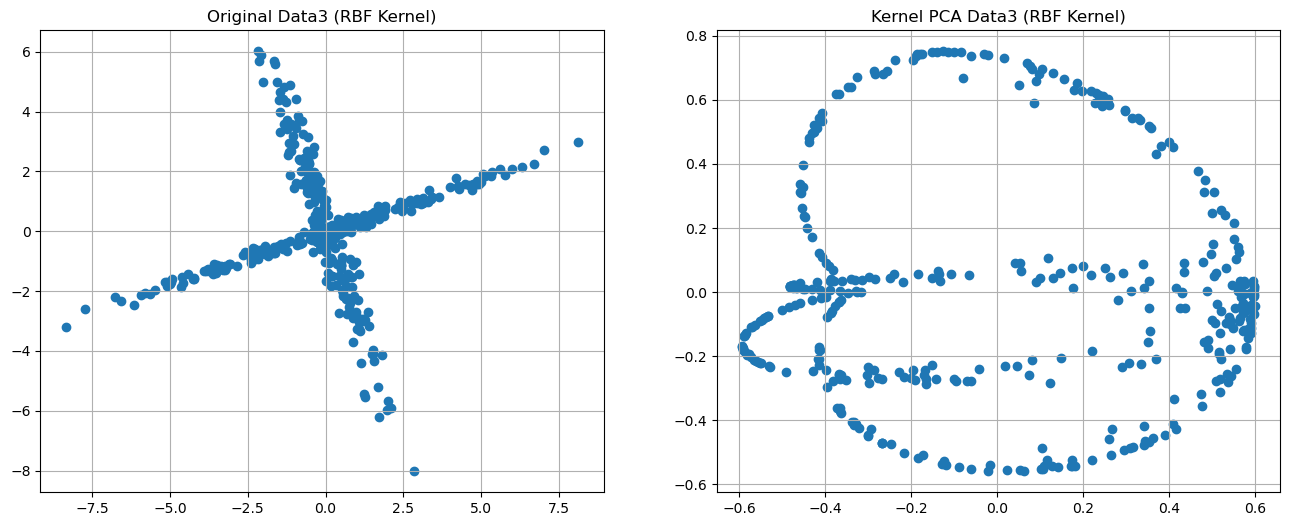

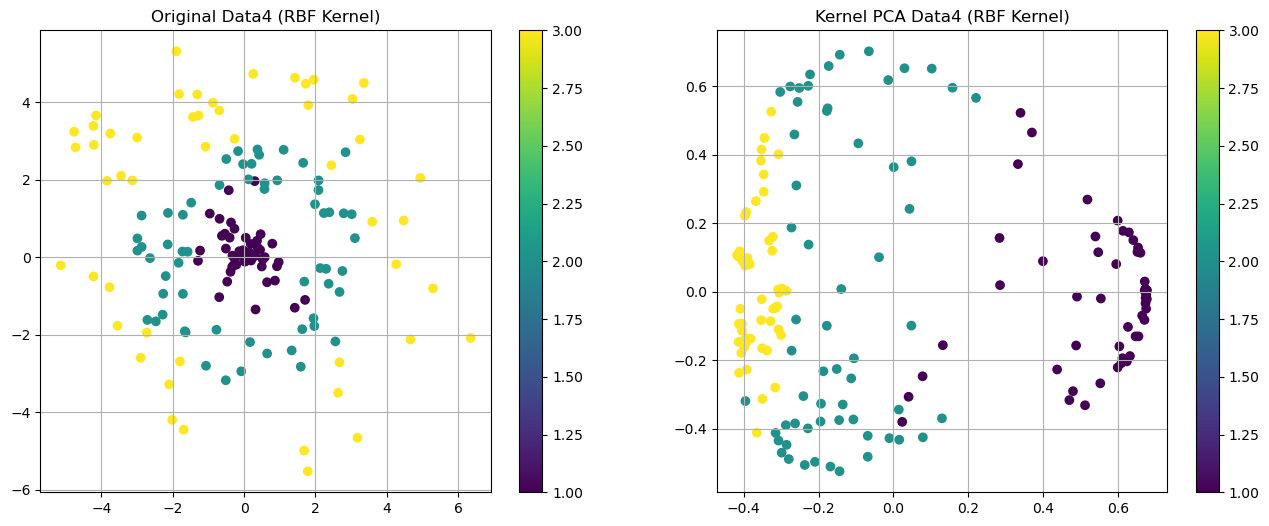

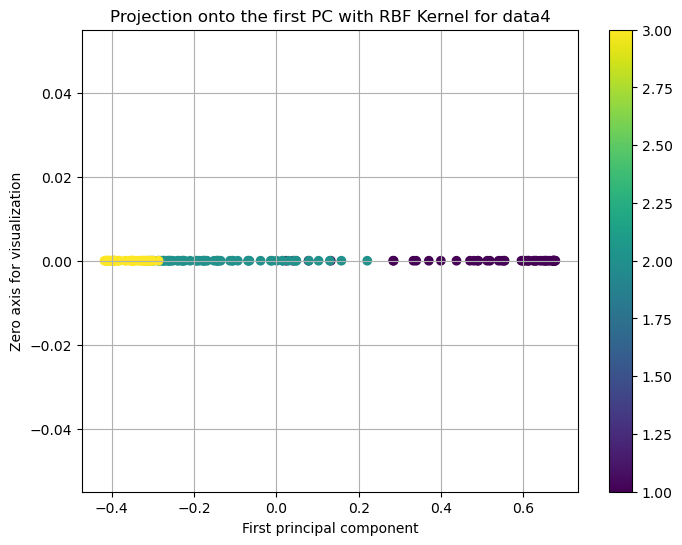

In [8]:
########## YOUR SOLUTION HERE ##########

from sklearn.decomposition import KernelPCA

def compare_plots(original_data, transformed_data, labels, title):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # If labels are None, just plot the original data points without coloring
    if labels is None:
        ax[0].scatter(original_data[:, 0], original_data[:, 1])
    else:
        scatter = ax[0].scatter(original_data[:, 0], original_data[:, 1], c=labels, cmap='viridis')
        fig.colorbar(scatter, ax=ax[0])

    ax[0].set_title(f'Original {title}')
    ax[0].grid()

    # Plot transformed data
    if labels is None:
        ax[1].scatter(transformed_data[:, 0], transformed_data[:, 1])
    else:
        scatter = ax[1].scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis')
        fig.colorbar(scatter, ax=ax[1])
    
    ax[1].set_title(f'Kernel PCA {title}')
    ax[1].grid()

    plt.show()

# Define Kernel PCA models with different kernels and parameters
kpca_poly_data3 = KernelPCA(n_components=2, kernel='poly', gamma=2, degree=3)
kpca_poly_data4 = KernelPCA(n_components=2, kernel='poly', gamma=2, degree=3)
kpca_rbf_data3 = KernelPCA(n_components=2, kernel='rbf', gamma=0.25)
kpca_rbf_data4 = KernelPCA(n_components=2, kernel='rbf', gamma=0.25)

# Fit-transform the data
X_kpca_poly_data3 = kpca_poly_data3.fit_transform(data3)
X_kpca_poly_data4 = kpca_poly_data4.fit_transform(data4[:, :-1])
X_kpca_rbf_data3 = kpca_rbf_data3.fit_transform(data3)
X_kpca_rbf_data4 = kpca_rbf_data4.fit_transform(data4[:, :-1])

# Now, use compare_plots to visualize the original and transformed data side by side
compare_plots(data3, X_kpca_poly_data3, None, "Data3 (Poly Kernel)")
compare_plots(data4[:, :-1], X_kpca_poly_data4, data4[:, -1], "Data4 (Poly Kernel)")
compare_plots(data3, X_kpca_rbf_data3, None, "Data3 (RBF Kernel)")
compare_plots(data4[:, :-1], X_kpca_rbf_data4, data4[:, -1], "Data4 (RBF Kernel)")

# For the RBF kernel projection of data4 onto the first principal component
X_kpca_rbf_data4_pc1 = kpca_rbf_data4.fit_transform(data4[:, :-1])[:, 0]
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca_rbf_data4_pc1, np.zeros_like(X_kpca_rbf_data4_pc1), c=data4[:, -1], cmap='viridis')
plt.title("Projection onto the first PC with RBF-Kernel for [data4]")
plt.xlabel("First principal component")
plt.ylabel("Zero axis as reference")
plt.colorbar()
plt.grid()
plt.show()


<h3 style="color:rgb(0,120,170)">Exercise 8 (10 points):</h3>

Can you observe advantages/disadvantages of Kernel PCA compared to PCA without
using a kernel? For which kind of data do you observe them?


Advantages of Kernel PCA :
1. **Uncovering Non-linear Structure**: The RBF kernel has successfully revealed a non-linear structure in data3. This circular pattern was not visible in the original space. Kernel PCA has the ability to explicit this patterns.

2. **Improved Separability**: In data4, the RBF kernel has improved the separability of the data points according to their labels. Three ranges are now clear: $x<-0.3$, $-0.3<x<0.2$ and $x>0.2$

Disadvantages of Kernel PCA:
1. **Sensitivity to Parameters**: 
The polynomial kernel seems to be very sensitive to the choice of parameters. From the graphs, seems that the suggested parameters (gamma=2, degree=3) may not be appropriate for the two datasets.

2. **Difficulty in Interpreting the graphs**: Both kernel transformations result in features that are hard to interpret compared to the axes in linear PCA.